## Steps Overview

    1. Read In Image
    2. Gray Scale and Blur Image
    3. Sobel Edge Detection
    4. Energy Map Produce
    5. Find Seam
    6. Remove Seam

### 1. Read In Image
<br>
There are many ways to read an image for python, Mostly with 3rd Party Library.<br><br>
Today, we will use <b>matplotlib</b> and <b>cv2</b> for comparison.

(599, 788, 3)


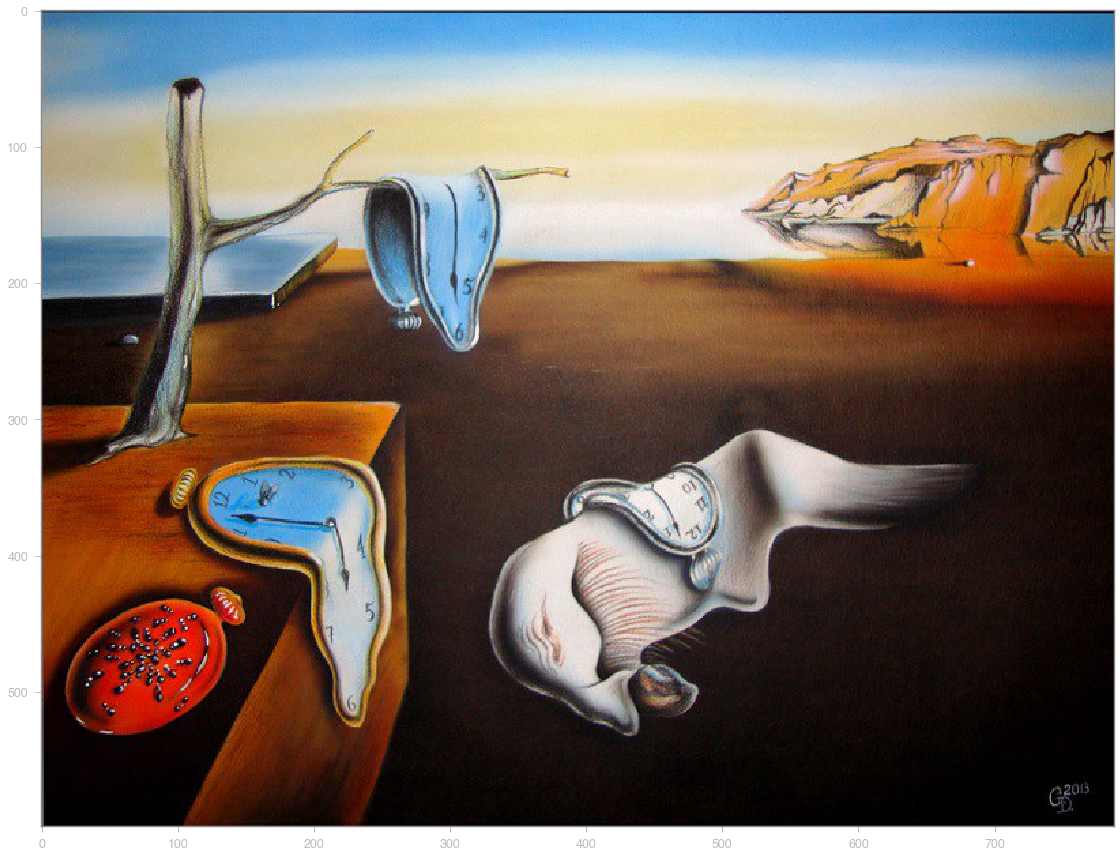

In [5]:
# Method 1 : Read in with Matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_plt = mpimg.imread("paint.jpg")

print(img_plt.shape)
# print(img_plt)
plt.figure(figsize=(20,15))
plt.imshow(img_plt)
plt.show()

In [ ]:
# Method 2 : Read in with cv2
import cv2

img_cv = cv2.imread("paint.jpg", cv2.IMREAD_COLOR)
# gray = cv2.imread('paint.jpg', cv2.IMREAD_GRAY)
# cv2.namedWindow('Paint Image', cv2.WINDOW_NORMAL)
cv2.imshow("Paint Image", img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Short Note:

Because of the ploting with notebook enable, we will use Matplotlib for future.<br>

### Gray Scale Image

    1. Method 1 : Using cv2
    2. Own Implement

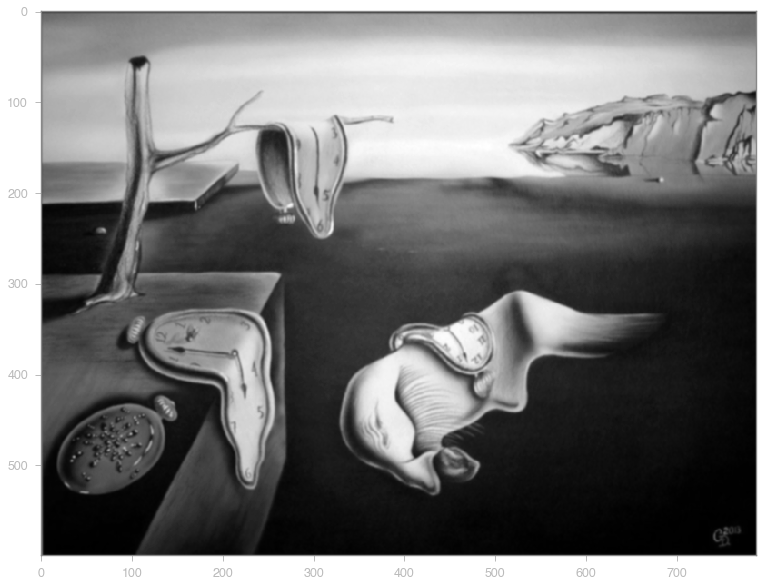

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

img_array = mpimg.imread('paint.jpg')
# img_array = cv2.imread('paint.jpg', cv2.IMREAD_COLOR)

# Using pre-built algorithm
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 1)

plt.figure(figsize=(15, 10))
plt.imshow(blurred, cmap='gray')
plt.show()

Original image shape :  (599, 788, 3)
Red channel shape :  (599, 788)


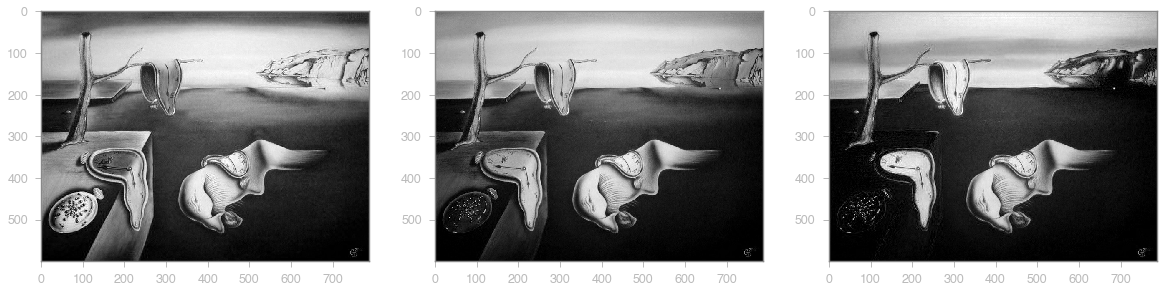

In [6]:
print("Original image shape : ", img_array.shape)
r = img_array[:,:,0]
g = img_array[:,:,1]
b = img_array[:,:,2]
print("Red channel shape : ", r.shape)

plt.figure(figsize=(20, 10))
plt.subplot(131);plt.imshow(r, cmap='gray')
plt.subplot(132);plt.imshow(g, cmap='gray')
plt.subplot(133);plt.imshow(b, cmap='gray')
plt.show()

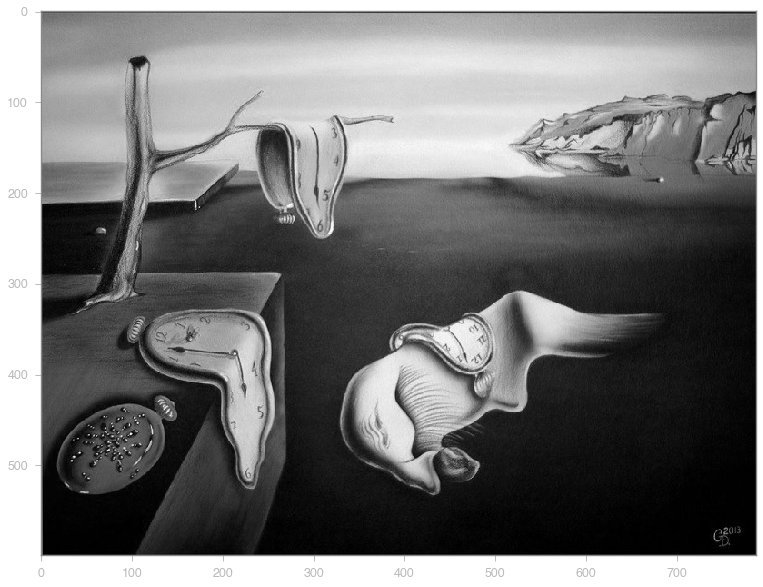

In [7]:
gray = 0.33*r + 0.33*g + 0.33*b
plt.figure(figsize=(15, 10))
plt.imshow(gray, cmap='gray')
plt.show()

#### Short Note:
<br>
Because Using cv2 is pretty easy and result if good, so, we will use cv2.cvtColor from now on.

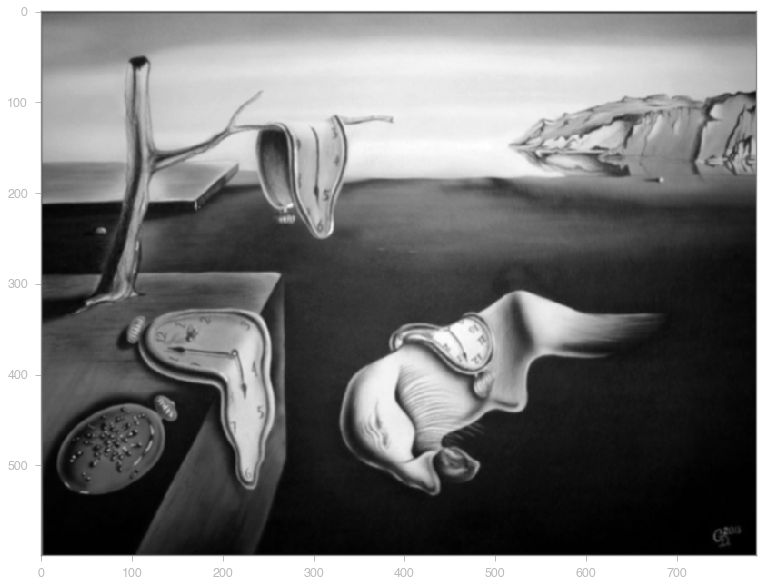

In [7]:
plt.figure(figsize=(15, 10))
plt.imshow(blurred, cmap='gray')
plt.show()

### Sobel Edge Detection

In [ ]:
# import cv2

# img_cv = cv2.imread("paint.jpg", cv2.IMREAD_COLOR)
# gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Paint Image", gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

413 0


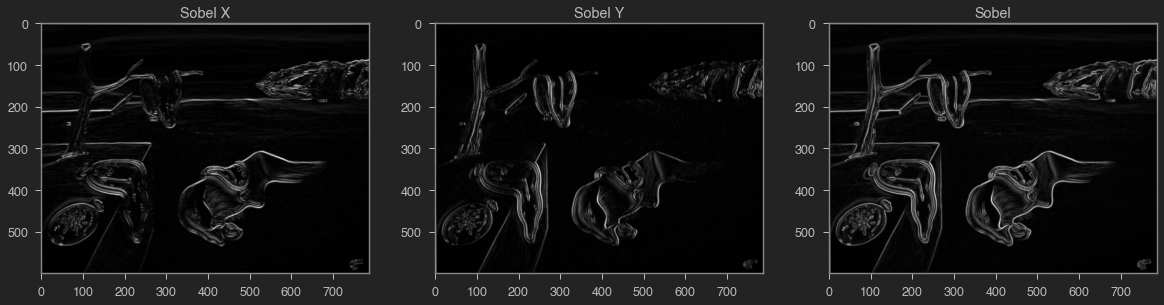

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

img_array = mpimg.imread('paint.jpg')

# Read In Image
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 1)
# print(blurred.dtype)

# sobel_x = np.abs(cv2.Sobel(blurred, 3, 0, 1))
# print(sobel_x.dtype)
# sobel_y = np.abs(cv2.Sobel(blurred, 3, 1, 0))

sobel_x = np.abs(cv2.Sobel(blurred, 3, 0, 1)).astype(np.uint32)
sobel_y = np.abs(cv2.Sobel(blurred, 3, 1, 0)).astype(np.uint32)
sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

print(np.max(sobel_x), np.min(sobel_x))
plt.figure(figsize=(20, 12))
plt.subplot(131);plt.imshow(sobel_x, cmap='gray');plt.title("Sobel X")
plt.subplot(132);plt.imshow(sobel_y, cmap='gray');plt.title("Sobel Y")
plt.subplot(133);plt.imshow(sobel, cmap='gray');plt.title("Sobel")
plt.show()

In [9]:
# Properties of dtype
# uint8 ~ 0-255
a = np.array([5], dtype=np.uint8)
b = (a + 290).astype(np.uint8)
c = a + 290

print(a, b, c)
print(a.dtype, b.dtype, c.dtype)

[5] [39] [295]
uint8 uint8 uint16


In [29]:
print("Read In Image Dtype : \t", img_array.dtype)
print("Gray scale Image Dtype : ", blurred.dtype)
print("Normal Sobel : \t\t", np.abs(cv2.Sobel(blurred, 3, 0, 1)).dtype)

print("\n", np.iinfo(np.uint8))
print('\n', np.iinfo(np.int16))

print('\n', np.max(sobel_y))

Read In Image Dtype : 	 uint8
Gray scale Image Dtype :  uint8
Normal Sobel : 		 int16

 Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------


 Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------


 476


### 4. Produce EMP (Energy Map)

In [2]:
h, w = sobel.shape
emp = np.zeros((h,w))
emp[0,:] = sobel[0,:]
# result_edge[-1,:] = sobel[-1,:]
for i in range(1, h):
    current = sobel[i, :]
    for j in range(w):
        left = max(0, j-1)
        right = min(j+1, w-1)
        emp[i, j] = np.min(emp[i-1, left:right] + current[j])
        
print(f"Image is in the range of : {np.min(emp)} ~ {np.max(emp)}")
emp = (emp/np.max(emp))

Image is in the range of : 0.0 ~ 12776.484919035778


Normalized Image is in the range of : 0.0 ~ 1.0


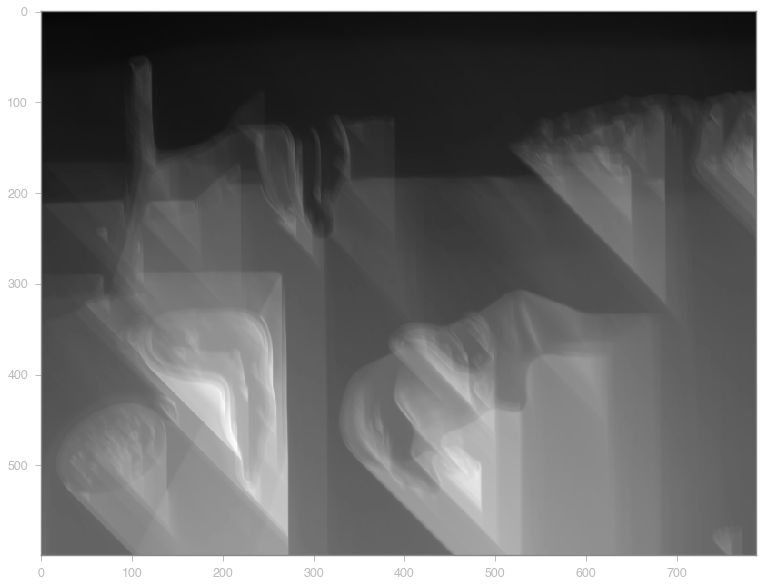

In [3]:
print(f"Normalized Image is in the range of : {np.min(emp)} ~ {np.max(emp)}")
plt.figure(figsize=(15, 10))
plt.imshow(emp, cmap='gray')
plt.show()

### 5. Find Seam

In [5]:
h, w = emp.shape
current = np.argmin(emp[-1, 100:int(w*0.98)]) + 100
seam = [current]
for i in range(h-2, -1, -1):
    left = max(0, current-1)
    right = min(current+1, w-1)
    current += np.argmin(emp[i, left:right]) - 1
    current = max(0, min(current, w-1))
    seam.append(current)

print(seam)

[362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 361, 360, 360, 359, 358, 358, 358, 357, 356, 355, 354, 353, 352, 352, 352, 352, 351, 350, 349, 348, 347, 346, 345, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 344, 343, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 341, 340, 339, 338, 338, 338, 338, 338, 338, 337, 336, 336, 336, 335, 335, 335, 334, 333, 332, 332, 332, 332, 332, 332, 332, 332, 331, 330, 330, 330, 330, 330, 329, 329, 329, 329, 329, 329, 329, 328, 328, 328, 328, 328, 328, 327, 327, 327, 327, 327, 327, 327, 326, 326, 326, 326, 326, 326, 326, 326, 325, 325, 324, 323, 323, 323, 322, 321, 320, 320, 320, 320, 320, 320, 320, 319, 319, 319, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 318, 317, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316,

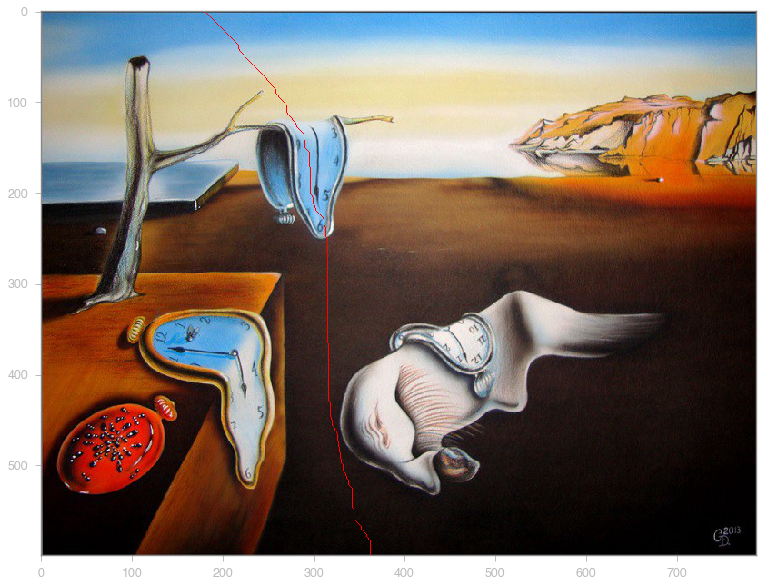

(599, 788, 3)


In [6]:
height_array = np.arange(h-1, -1, -1)
img_copy = np.copy(img_array)
img_copy[height_array, seam, :] = [255, 0, 0]
plt.figure(figsize=(15, 10))
plt.imshow(img_copy)
plt.show()

print(img_array.shape)

### Remove seam

(599, 788, 3)
(599, 787, 3)


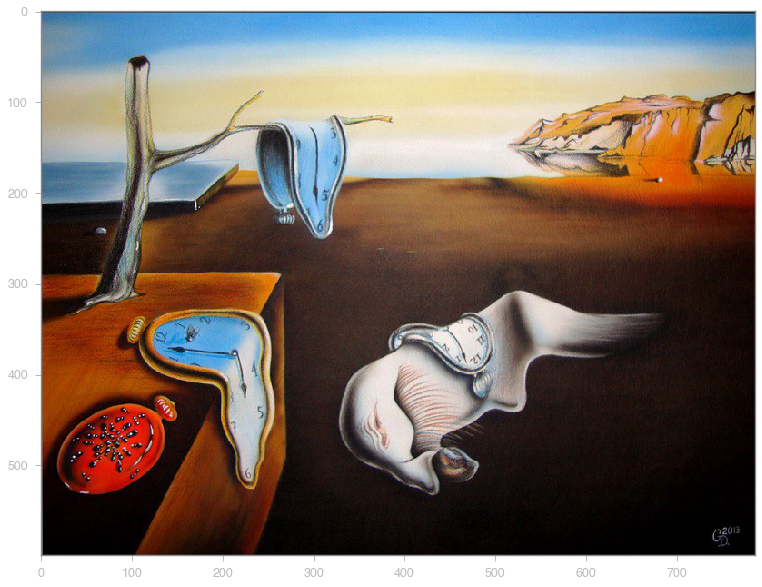

In [8]:
resized_img = np.zeros((h, w-1, 3)).astype(np.uint8)
for i in range(h):
    resized_img[height_array[i], :seam[i], :] = img_array[height_array[i] , :seam[i], :]
    resized_img[height_array[i], seam[i]:, :] = img_array[height_array[i], (seam[i]+1) : , :]

print(img_array.shape)
print(resized_img.shape)
plt.figure(figsize=(15, 10))
plt.imshow(resized_img)
plt.show()